In [2]:
##importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
from sklearn.model_selection import train_test_split

def generate_data(n, d, mu_x, var, var_e, theta):
    X_raw = np.random.multivariate_normal(mu_x, var, n)
    X_1 = np.ones(n)
    X = np.c_[X_1, X_raw]
    theta = np.mat(theta)
    noise = np.random.normal(0, var_e, n)
    noise = np.mat(noise).T
    y = np.dot(X, theta.T) + noise
    return X_raw, X, y

def learning_theta(X, y, theta):
    theta = np.mat(theta).T
    
    ##Pseudo-Inverse
    start_pinv = time.time()
    theta_hat_pinv = np.dot(np.linalg.pinv(X), y)
    end_pinv = time.time()
    error_pinv = np.linalg.norm(theta - theta_hat_pinv)/np.linalg.norm(theta)
    
    ##Solution of Normal Equations
    start_norm = time.time()
    theta_hat_norm = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T),y)
    end_norm = time.time()
    error_norm = np.linalg.norm(theta - theta_hat_norm)/np.linalg.norm(theta)
    
    ##Gradient Descent
    start_gd = time.time()
    alpha = 1e-2
    max_iter = 1000
    theta_hat_gd = np.zeros_like(theta)
    
    for t in range(max_iter):
        theta_hat_gd = theta_hat_gd - (alpha * (np.dot(np.dot(X.T,X), theta_hat_gd) - np.dot(X.T, y)))
        
    end_gd = time.time()
    error_gd = np.linalg.norm(theta - theta_hat_gd)/np.linalg.norm(theta)
    
    ##Printing Error for each case and time required
    print('Error for Pseudo-Inverse is : ', error_pinv)
    print('Time required for Pseudo-Inverse is : ', (end_pinv - start_pinv))
    print('Error for Normal Equations is : ', error_norm)
    print('Time required for Normal Equations is : ', (end_norm - start_norm))
    print('Error for Gradient Descent is : ', error_gd)
    print('Time required for Gradient Descent is : ', (end_gd - start_gd))
    
    return error_pinv, error_norm, error_gd

def plot_figure(n_list, d, mu_x, var, var_e, theta):
    error_pinv_list = []
    error_norm_list = []
    error_gd_list = []
    
    for i in n_list:
        X_raw, X, y = generate_data(i, d, mu_x, var, var_e, theta)
        error_pinv, error_norm, error_gd = learning_theta(X, y, theta)
        error_pinv_list.append(error_pinv)
        error_norm_list.append(error_norm)
        error_gd_list.append(error_gd)
        
    plt.figure(figsize=(12,8))
    plt.scatter(n_list, error_pinv_list, marker='x', color='r', label = 'pinv')
    plt.scatter(n_list, error_norm_list, marker='o', color='b', label = 'norm')
    plt.scatter(n_list, error_gd_list, marker='*', color='y', label = 'gd')
    ax = plt.subplot(111)
    ax.set_xlabel(..., fontsize=20)
    ax.set_ylabel(..., fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.rcParams.update({'font.size': 20})
    plt.xlabel('Number of Datapoints')
    plt.ylabel('Error')
    plt.legend()
    plt.show
    
def real_data(url, alpha, max_iter):
    df = pd.read_csv(url, sep='\t', header=None, names=['X1', 'X2', 'X3', 'X4', 'X5', 'y'])
    X = df.loc[:, :'X5']
    X_1 = np.ones(X.shape[0])
    X = np.c_[X_1, X]
    y = df.loc[:, 'y'].to_frame().values.reshape(-1, 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    theta_hat_gd = np.zeros(X.shape[1])
    
    for t in range(max_iter):
        theta_hat_gd = theta_hat_gd - (alpha * (np.dot(np.dot(X_train.T, X_train), theta_hat_gd) - np.dot(X_train.T, y_train)))
        
    y_hat = np.dot(X_test, theta_hat_gd)
    
    error_metric = np.sum(np.square(y_test - y_hat)) / len(y_test)
    
    return error_metric



***For n = 30***
(30, 5)
---------------------------------------------------------------------------
(30, 6)
---------------------------------------------------------------------------
(30, 1)
---------------------------------------------------------------------------
Error for Pseudo-Inverse is :  2.6039513990117145e-15
Time required for Pseudo-Inverse is :  0.04713129997253418
Error for Normal Equations is :  1.8679380250427553e-16
Time required for Normal Equations is :  0.057782649993896484
Error for Gradient Descent is :  2.3730026180184196e-16
Time required for Gradient Descent is :  0.04113054275512695
***For n = 100***
(100, 5)
---------------------------------------------------------------------------
(100, 6)
---------------------------------------------------------------------------
(100, 1)
---------------------------------------------------------------------------
Error for Pseudo-Inverse is :  6.107235845698196e-16
Time required for Pseudo-Inverse is :  0.0696640014648437

C:\Users\sbhatta\AppData\Local\Temp/ipykernel_12512/791188773.py:41: RuntimeWarning: invalid value encountered in subtract
  theta_hat_gd = theta_hat_gd - (alpha * (np.dot(np.dot(X.T,X), theta_hat_gd) - np.dot(X.T, y)))


Error for Pseudo-Inverse is :  6.128197474314159e-16
Time required for Pseudo-Inverse is :  0.0
Error for Normal Equations is :  2.420752332774414e-16
Time required for Normal Equations is :  0.0
Error for Gradient Descent is :  nan
Time required for Gradient Descent is :  0.051045894622802734


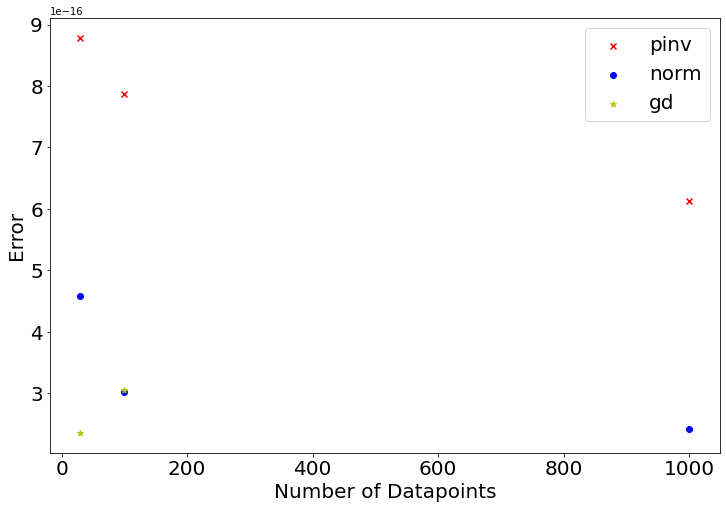

In [3]:
##Question-1.(a) & Question-2 Part (1) Plot-1
n_mat = [30, 100, 1000]
for i in range(len(n_mat)):
    var = np.eye(5)
    X_raw, X, y = generate_data(n_mat[i], 5, [0, 0, 0, 0, 0], var, 0, [0, 1, 4, 2, 10, 23])
    print("***For n = "+str(n_mat[i])+"***")
    print(X_raw.shape)
    print('---------------------------------------------------------------------------')
    print(X.shape)
    print('---------------------------------------------------------------------------')
    print(y.shape)
    print('---------------------------------------------------------------------------')
    
    learning_theta(X, y, [0,1,4,2,10,23])
    
plot_figure([30, 100, 1000], 5, [0, 0, 0, 0, 0], var, 0, [0, 1, 4, 2, 10, 23])

In [ ]:
##Question-1.(b) & Question-2 Part (1) Plot-1
n_mat = [30, 100, 1000]
for i in range(len(n_mat)):
    var = np.eye(5)
    var_e = 1e-6
    X_raw, X, y = generate_data(n_mat[i], 5, [0, 0, 0, 0, 0], var, var_e, [0, 1, 4, 2, 10, 23])
    print("***For n = "+str(n_mat[i])+"***")
    print(X_raw.shape)
    print('---------------------------------------------------------------------------')
    print(X.shape)
    print('---------------------------------------------------------------------------')
    print(y.shape)
    print('---------------------------------------------------------------------------')
    
    learning_theta(X, y, [0,1,4,2,10,23])
    
plot_figure([30, 100, 1000], 5, [0, 0, 0, 0, 0], var, 1e-6, [0, 1, 4, 2, 10, 23])


In [ ]:
##Question-1.1.iii) Testing data generate for 1.(b)
n_mat = [30, 100, 1000]
for i in range(len(n_mat)):   
    n_test = int(round(0.1 * n_mat[i]))
    X_raw, X, y_hat = generate_data(n_test, 5, [0, 0, 0, 0, 0], var, var_e, [0, 1, 4, 2, 10, 23])
    print("***Y_hat For n = "+str(n_mat[i])+"***")
    print(y_hat)

In [ ]:
#Question-1.(c)
n_mat = [100, 100, 1000]
for i in range(len(n_mat)):
    var = np.eye(5)
    var_e = 1e-6
    X_raw, X, y = generate_data(n_mat[i], 5, [0, 0, 0, 0, 0], var, var_e, [0, 1, 4, 2, 10, 23])
    print("***For n = "+str(n_mat[i])+"***")
    print(X_raw.shape)
    print('---------------------------------------------------------------------------')
    print(X.shape)
    print('---------------------------------------------------------------------------')
    print(y.shape)
    print('---------------------------------------------------------------------------')
    
    learning_theta(X, y, [0,1,4,2,10,23])
    
plot_figure([100, 100, 1000], 5, [0, 0, 0, 0, 0], var, 1e-6, [0, 1, 4, 2, 10, 23])

In [ ]:
##Question-1.(d)
n_mat = [30, 100, 1000]
for i in range(len(n_mat)):
    var = np.eye(5)
    var_e = 1e-6
    X_raw, X, y = generate_data(n_mat[i], 5, [1, 1, 1, 1, 1], var, var_e, [1, 1, 4, 2, 10, 23])
    print("***For n = "+str(n_mat[i])+"***")
    print(X_raw.shape)
    print('---------------------------------------------------------------------------')
    print(X.shape)
    print('---------------------------------------------------------------------------')
    print(y.shape)
    print('---------------------------------------------------------------------------')
    
    learning_theta(X, y, [0,1,4,2,10,23])
    
plot_figure([30, 100, 1000], 5, [1, 1, 1, 1, 1], var, 1e-6, [1, 1, 4, 2, 10, 23])

In [ ]:
##Question-1.(e)
temp = np.array([1,3,5,7,9])
cov = np.zeros((5,5))
for i in range(5):
    cov[i][i] = temp[i]
    
var = cov
plot_figure([30, 100, 1000], 5, [0, 0, 0, 0, 0], var, 1e-6, [0, 1, 4, 2, 10, 23])

In [ ]:
##Question-2 Part (2) Plot-2
def learning_theta_pinv(X, y, theta):
    theta = np.mat(theta).T
    
    ##Pseudo-Inverse
    theta_hat_pinv = np.dot(np.linalg.pinv(X), y)
    error_pinv = np.linalg.norm(theta - theta_hat_pinv)/np.linalg.norm(theta)
    
    ##Printing Error for each case and time required
    ##print('Error for Pseudo-Inverse is : ', error_pinv)


    return error_pinv


def plot_figure_pinv(n_list_1ab, n_list_1c, d, mu_x, var, var_e, theta):
    error_pinv_1a_list = []
    error_pinv_1b_list = []
    error_pinv_1c_list = []
    var_e = 1e-6
    
    for i in n_list_1ab:
        X_raw, X, y = generate_data(i, d, mu_x, var, 0, theta)
        error_pinv_1a = learning_theta_pinv(X, y, theta)
        error_pinv_1a_list.append(error_pinv_1a)
   
    for i in n_list_1ab:
        X_raw, X, y = generate_data(i, d, mu_x, var, var_e, theta)
        error_pinv_1b = learning_theta_pinv(X, y, theta)
        error_pinv_1b_list.append(error_pinv_1b)

    for i in n_list_1c:
        X_raw, X, y = generate_data(i, d, mu_x, var, var_e, theta)
        error_pinv_1c = learning_theta_pinv(X, y, theta)
        error_pinv_1c_list.append(error_pinv_1c)
        
    plt.figure(figsize=(12,8))
    plt.scatter(n_list_1ab, error_pinv_1a_list, marker='x', color='r', label = 'pinv 1a')
    plt.scatter(n_list_1ab, error_pinv_1b_list, marker='o', color='b', label = 'pinv 1b')
    plt.scatter(n_list_1c, error_pinv_1c_list, marker='*', color='y', label = 'pinv 1c')
    ax = plt.subplot(111)
    ax.set_xlabel(..., fontsize=20)
    ax.set_ylabel(..., fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.rcParams.update({'font.size': 20})
    plt.xlabel('Number of Datapoints')
    plt.ylabel('Error')
    plt.legend()
    plt.show
    
plot_figure_pinv([30, 100, 1000], [100, 100, 1000], 5, [0, 0, 0, 0, 0], var, var_e, [0, 1, 4, 2, 10, 23])

In [ ]:
##Question-2 Part (3)
#Table provided in report for comparison in part 1.(d)

In [ ]:
##Question-2 Part (4)


In [ ]:
##Question 3
#read the csv file
error_metric = real_data('https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat', 2*1e-11, 10)
print('Error Metric for Gradient Descent = ', error_metric)
